# Project: Investigate a Dataset - [TMDb Movies Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#conclusions">Limitation</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

### Questions for Analysis
1. Number of movies released across the years
2. Rating of movies over the year
3. Average runtime of movies from year to year
4. Genres with the highest movie release
5. Top 20 movie Directors over the years
6. Profit made on movies across the years
7. Correlation between profit made and Popularity of the movies


## Data Wrangling

In [1]:
#import all the necessary packages for the analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Load the dataset in pandas dataframe

df = pd.read_csv('tmdb_movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#check all df columns
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [4]:
#summary of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
#brief statiscal detail of the dataframe

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning

1. create a copy of the dataset
2. check and remove duplicates
3. drop unused columns
4. convert 'release date' column to datatime format
5. fix missing values

In [35]:
#create a copy of the original dataset and work with it
df_movies = df.copy()

In [36]:
#check duplicates
sum(df_movies.duplicated())

1

In [37]:
# remove duplicates
df_movies.drop_duplicates(inplace=True)

In [38]:
#remove unused columns
df_movies.drop(["id", "cast","imdb_id","homepage","tagline","keywords","overview"], inplace=True, axis=1)

In [39]:
# Convert 'release_date' column datatype from str to datetime 
df_movies["release_date"] = pd.to_datetime(df_movies["release_date"])

In [40]:
#check missing values
df_movies.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [41]:
#fill columns with missing values with the mode in their respective columns

cols = ['director','genres','production_companies']
df_movies[cols] = df_movies[cols].fillna(df_movies[cols].mode().iloc[0])

In [42]:
#confirm all changes

df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10865 non-null  float64       
 1   budget                10865 non-null  int64         
 2   revenue               10865 non-null  int64         
 3   original_title        10865 non-null  object        
 4   director              10865 non-null  object        
 5   runtime               10865 non-null  int64         
 6   genres                10865 non-null  object        
 7   production_companies  10865 non-null  object        
 8   release_date          10865 non-null  datetime64[ns]
 9   vote_count            10865 non-null  int64         
 10  vote_average          10865 non-null  float64       
 11  release_year          10865 non-null  int64         
 12  budget_adj            10865 non-null  float64       
 13  revenue_adj     

## Exploratory Data Analysis

### Research Question 1 (Number of movies released across the years)

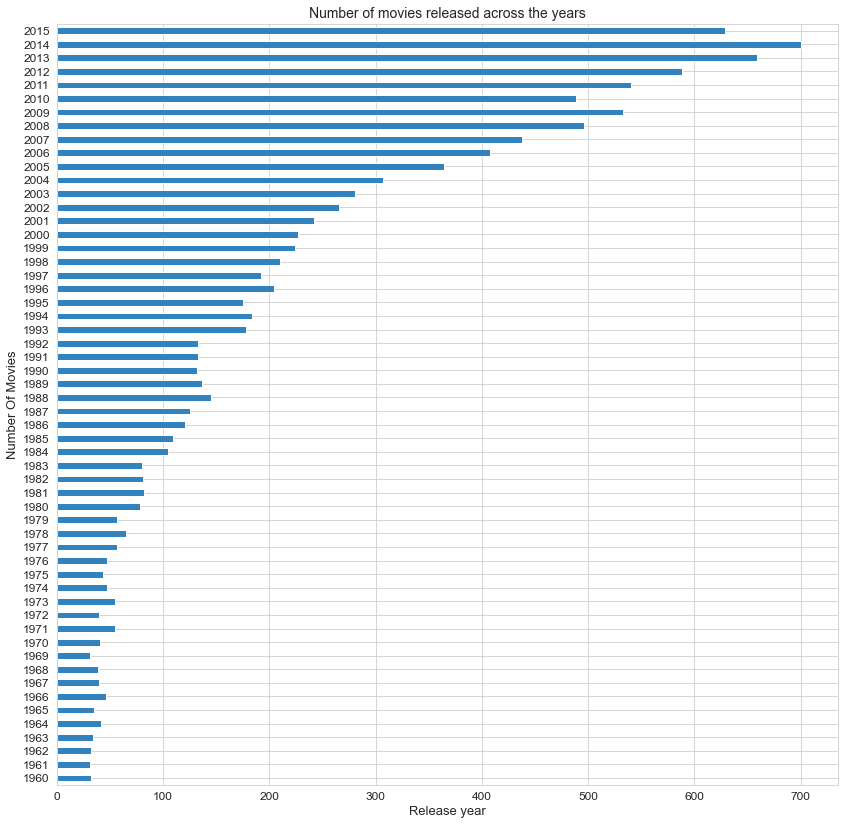

In [43]:
#Number of movies released across the years

df_movies.groupby('release_year')['revenue'].count().plot(kind= 'barh',figsize = (14,14),fontsize=12,colormap='tab20c') 
plt.title("Number of movies released across the years",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
sns.set_style("whitegrid")

-The number of movies released was gradually increasing over the years with 2014 having the hightest movie released

### Research Question 2 (Average vote of movies per year)

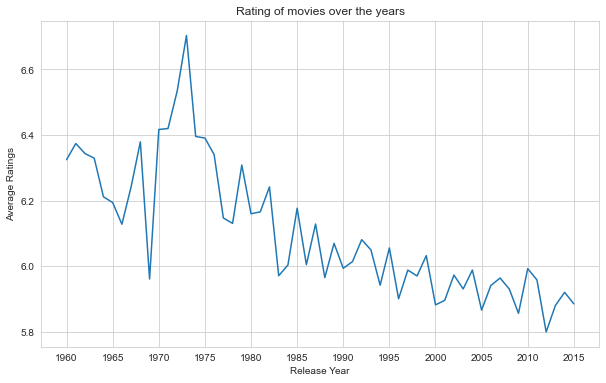

In [44]:
#average vote of movies per year

df_movies.groupby('release_year')['vote_average'].mean().plot(xticks = np.arange(1960,2016,5),figsize = (10,6))
plt.xlabel('Release Year')
plt.ylabel('Average Ratings')
plt.title('Rating of movies over the years')
plt.show()

-It is observed that average rating  of movies have reduced significantly over the years


### Research Question 3 (Average runtime of movies from year to year)

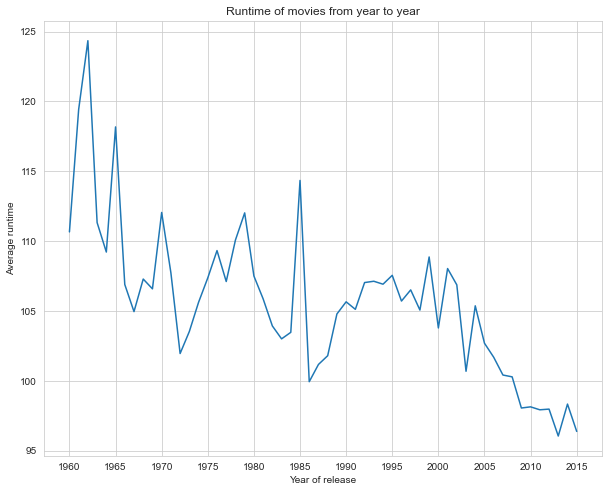

In [45]:
#Average runtime of movies from year to year

df_movies.groupby('release_year')['runtime'].mean().plot(xticks = np.arange(1960,2016,5),figsize = (10,8))
plt.title('Runtime of movies from year to year')
plt.xlabel('Year of release')
plt.ylabel('Average runtime')
plt.show()

-It is observed that the runtime of movies produced has significantly reduced across the years


### Research Question 4 (The genres with the highest movie release)

In [46]:
def separate_count(column):
    split_data = pd.Series(df[column].str.cat(sep = '|').split('|'))
    
    count_data = split_data.value_counts(ascending=False)
    return count_data

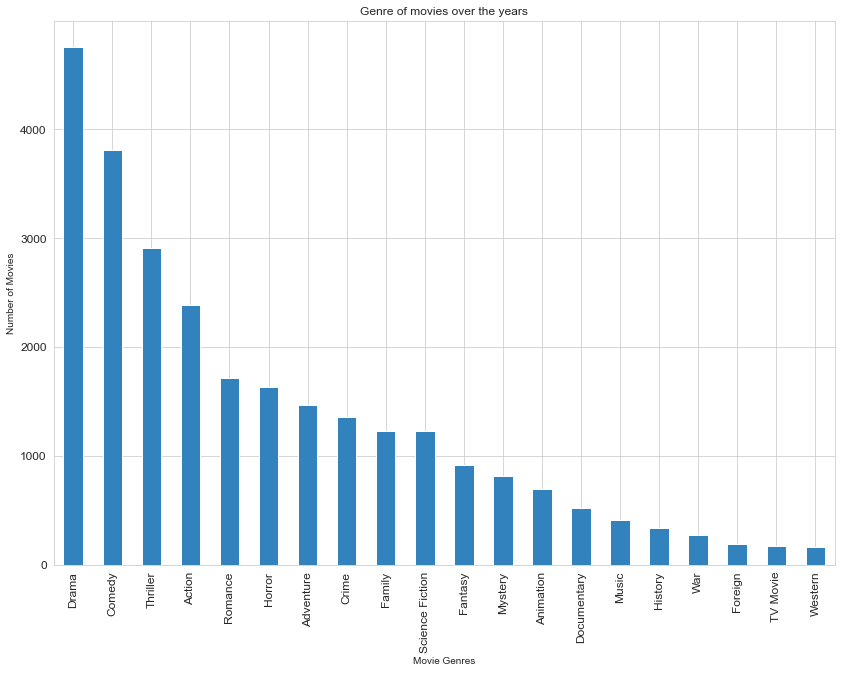

In [47]:
#The genres with the highest movie release

def research_column(col_name):
    pop_data = pd.Series(df_movies[col_name].str.cat(sep = '|').split('|'))
    data_counter =  pop_data.value_counts()
    return data_counter

research_column('genres').plot(kind= 'bar',figsize = (14,10),fontsize=12,colormap='tab20c') 
plt.title('Genre of movies over the years')
plt.xlabel('Movie Genres')
plt.ylabel('Number of Movies')
plt.show()

-Of all the movie genres released, Drama has the highest frequency, followed by Comedy and Thriller


### Research Question 5 (Top 20 movie Directors over the years)

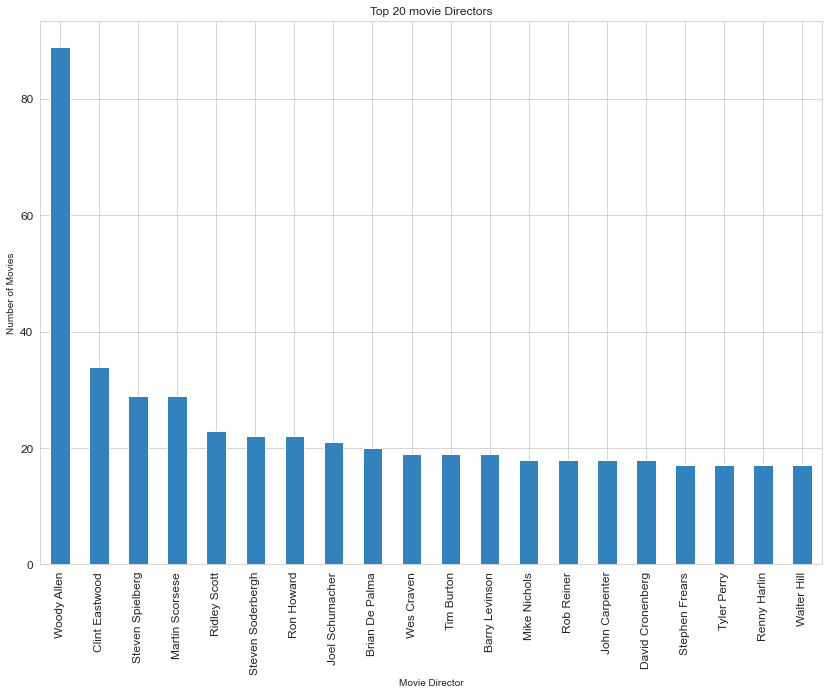

In [48]:
#Top 20 movie Directors over the years

df_movies.director.value_counts().iloc[0:20].plot(kind= 'bar',figsize = (14,10),fontsize=12,colormap='tab20c')
plt.title('Top 20 movie Directors')
plt.xlabel('Movie Director')
plt.ylabel('Number of Movies')
plt.show()

-Woody Allen directed the most movies across the years, followed by Clint Eastwood and Steven Spielberg 


### Research Question 6 (Profit made on movies across the years)

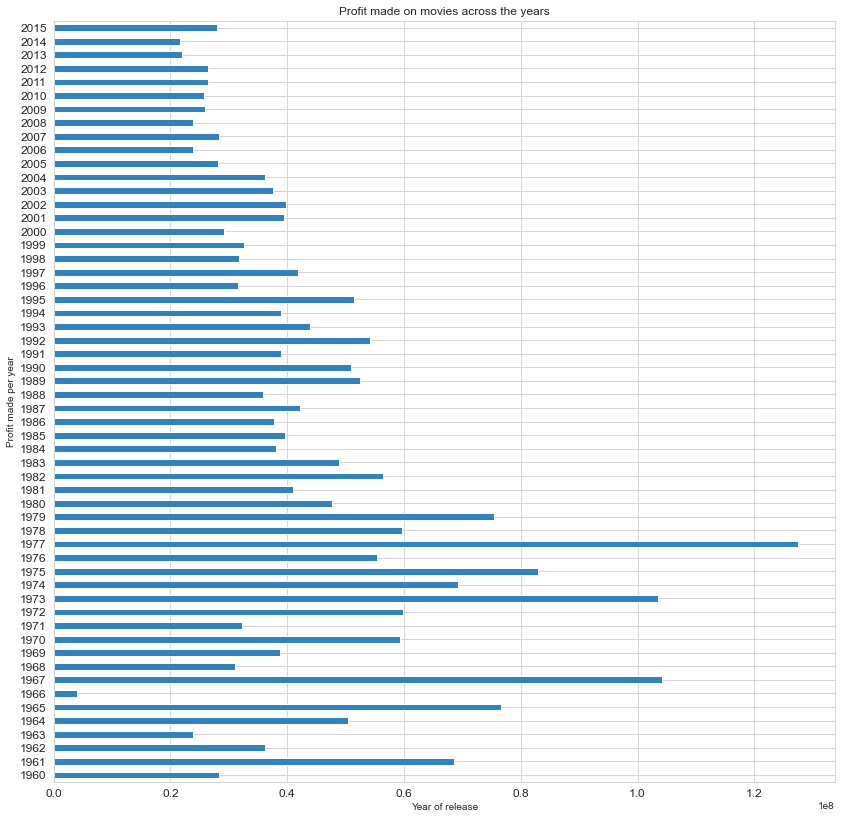

In [49]:
#Profit made on movies across the years

df_movies['Profit'] = df_movies['revenue_adj'] - df_movies['budget_adj']
df_movies.groupby('release_year')['Profit'].mean().plot(kind= 'barh',figsize = (14,14),fontsize=12,colormap='tab20c')
plt.title('Profit made on movies across the years')
plt.xlabel('Year of release')
plt.ylabel('Profit made per year')
plt.show()

-By considering the budget and revenue of movies produced over the years, Profit made on movies has significantly, while 1977 remains the year with the highest movie profit


### Research Question 7 (Correlation between profit made and Popularity of the movies)

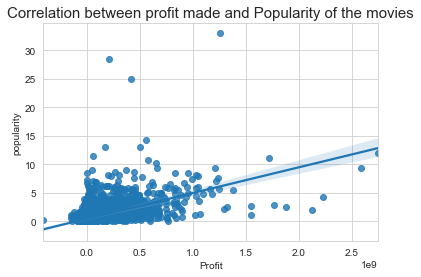

In [50]:
#Correlation between profit made and Popularity of the movies

sns.regplot(x=df_movies["Profit"],y=df_movies["popularity"]).set_title("Correlation between profit made and Popularity of the movies",size=15)
plt.show()

There is a significant correlation between the popularity of the movies and the profit made with the exception of some outliers

In [51]:
#check correlation between Profit and Popularity using pearson value

from scipy import stats
stats.pearsonr(df_movies['Profit'], df_movies['popularity'])

(0.5628384633779523, 0.0)

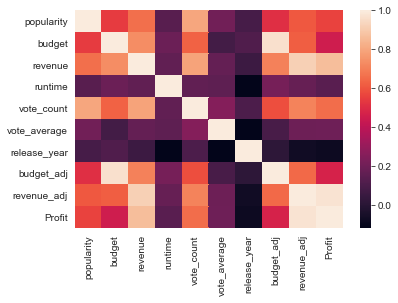

In [52]:
#checking general correlation with heat map
sns.heatmap(df_movies.corr());

-From analysis of the correlation between Profit and Popularity of movies,we can conclude that the Profit made has a direct relationship of increment with the popularity of the movies

### Conclusion

-The number of movies released was gradually increasing over the years with 2014 having the hightest movie released

-It is observed that average rating  of movies have reduced significantly over the years

-It is observed that the runtime of movies produced has significantly reduced across the years

-Of all the movie genres released, Drama has the highest frequency, followed by Comedy and Thriller

-Woody Allen directed the most movies across the years, followed by Clint Eastwood and Steven Spielberg 

-By considering the budget and revenue of movies produced over the years, Profit made on movies has significantly, while 1977 remains the year with the highest movie profit

-From analysis of the correlation between Profit and Popularity of movies,we can conclude that the Profit made has a direct relationship of increment with the popularity of the movies

## Limitations

-Missing values were fixed by inputing the modal values for each column

-The budget and revenue columns have no currency unit

-The release date column was not in datatime format

-The dataset contained unneeded columns

#### References

https://github.com/YasmeenDos/Investigate-a-Dataset/blob/master/Investigate-TMDb%20(1).ipynb

https://github.com/deepak525/Investigate_TMDb_Movies/blob/master/investigate_the_TBMb_Dataset.ipynb

https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/08_correlation.html

https://medium.com/geekculture/investigate-tmvb-movie-dataset-28a27b1f3912

https://stackoverflow.com 

https://www.w3schools.com

https://www.geeksforgeeks.org 